## Imports

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
# from impedance.models.circuits import CustomCircuit
# from impedance.visualization import plot_nyquist # Kept if you want to switch plotting methods

## Data imports

In [138]:
# --- Data Loading ---

def EIS_z60_import(filename):
    """ Import z60 file as pandas dataframe."""
    df = pd.read_csv(
        filename,
        skiprows=11,
        sep='\s+',
        header=None,
        names=["Freq", "Ampl", "Bias", "Time", "Z'", "Z''", "GD", "Err", "Range"],
        index_col="Freq")

    df = df.drop(columns=['Ampl', 'Bias', 'Time', 'GD', 'Err', 'Range']) # Drop columns
    mask = (df["Z'"] > 0) & (df["Z''"] < 0) # Only keep first quadrant in Nyquist plot

    df['Z'] = np.sqrt( (df["Z'"].to_numpy())**2 + \
                       (df["Z'"].to_numpy())**2 )

    df['theta'] = np.arctan2(-df["Z'"].to_numpy(), df["Z''"].to_numpy()) * 180 / np.pi
    
    df[~mask] = None
    return df

In [139]:

    
try:
    HS_EIS_10mV_1_df = EIS_z60_import("./HIPed_Stellite1_EIS/10mV_1.z60")
    HS_EIS_10mV_2_df = EIS_z60_import("./HIPed_Stellite1_EIS/10mV_2.z60")
    HS_EIS_10mV_3_df = EIS_z60_import("./HIPed_Stellite1_EIS/10mV_3.z60")

    HS_EIS_20mV_1_df = EIS_z60_import("./HIPed_Stellite1_EIS/20mV_1.z60")
    HS_EIS_20mV_2_df = EIS_z60_import("./HIPed_Stellite1_EIS/20mV_2.z60")
    HS_EIS_20mV_3_df = EIS_z60_import("./HIPed_Stellite1_EIS/20mV_3.z60")    

    HS_EIS_30mV_1_df = EIS_z60_import("./HIPed_Stellite1_EIS/30mV_1.z60")
    HS_EIS_30mV_2_df = EIS_z60_import("./HIPed_Stellite1_EIS/30mV_2.z60")
    HS_EIS_30mV_3_df = EIS_z60_import("./HIPed_Stellite1_EIS/30mV_3.z60")

    CS_EIS_10mV_1_df = EIS_z60_import("./Cast_Stellite1_EIS/10mV_4.z60")
    CS_EIS_10mV_2_df = EIS_z60_import("./Cast_Stellite1_EIS/10mV_5.z60")
    CS_EIS_10mV_3_df = EIS_z60_import("./Cast_Stellite1_EIS/10mV_6.z60")
    
    CS_EIS_20mV_1_df = EIS_z60_import("./Cast_Stellite1_EIS/20mV_4.z60")
    CS_EIS_20mV_2_df = EIS_z60_import("./Cast_Stellite1_EIS/20mV_5.z60")
    CS_EIS_20mV_3_df = EIS_z60_import("./Cast_Stellite1_EIS/20mV_6.z60")
    
    CS_EIS_30mV_1_df = EIS_z60_import("./Cast_Stellite1_EIS/30mV_4.z60")
    CS_EIS_30mV_2_df = EIS_z60_import("./Cast_Stellite1_EIS/30mV_5.z60")
    CS_EIS_30mV_3_df = EIS_z60_import("./Cast_Stellite1_EIS/30mV_6.z60")
        
except FileNotFoundError as e:
    print(f"Error: File was not found.")
    print(e.message)
    print(e.args)
    exit()
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

#CS_EIS_10mV_1_df

In [140]:
HS_EIS_20mV_2_df 

Z'           Z''              Z       theta
Freq                                                              
10000.000000      13.6844      -8.73995      19.352664 -122.565549
8902.150000       13.9926      -9.50130      19.788525 -124.177414
7924.830000       14.2974     -10.32960      20.219577 -125.847396
7054.800000       14.5487     -11.16810      20.574969 -127.511128
6280.290000       14.8062     -12.11390      20.939129 -129.288796
...                   ...           ...            ...         ...
0.146085      342592.0000 -314337.00000  484498.252761 -132.537184
0.130047      362881.0000 -308746.00000  513191.231728 -130.391764
0.115770      401529.0000 -311649.00000  567847.757486 -127.817028
0.103060      438102.0000 -306492.00000  619569.790103 -124.976271
0.100000      434801.0000 -327843.00000  614901.471133 -127.016549

[100 rows x 4 columns]

## Calculating average and standard deviation, and throwing it into one df

In [141]:
# Calculating average and standard deviation 

CS_df_10mV_concat = pd.concat([CS_EIS_10mV_1_df, CS_EIS_10mV_2_df, CS_EIS_10mV_3_df])
CS_df_10mV_means = CS_df_10mV_concat.groupby(CS_df_10mV_concat.index).mean()
CS_df_10mV_err = CS_df_10mV_concat.groupby(CS_df_10mV_concat.index).std()

CS_df_20mV_concat = pd.concat([CS_EIS_20mV_1_df, CS_EIS_20mV_2_df, CS_EIS_20mV_3_df])
CS_df_20mV_means = CS_df_20mV_concat.groupby(CS_df_20mV_concat.index).mean()
CS_df_20mV_err = CS_df_20mV_concat.groupby(CS_df_20mV_concat.index).std()

CS_df_30mV_concat = pd.concat([CS_EIS_30mV_1_df, CS_EIS_30mV_2_df, CS_EIS_30mV_3_df])
CS_df_30mV_means = CS_df_30mV_concat.groupby(CS_df_30mV_concat.index).mean()
CS_df_30mV_err = CS_df_30mV_concat.groupby(CS_df_30mV_concat.index).std()

HS_df_10mV_concat = pd.concat([HS_EIS_10mV_1_df, HS_EIS_10mV_2_df, HS_EIS_10mV_3_df])
HS_df_10mV_means = HS_df_10mV_concat.groupby(HS_df_10mV_concat.index).mean()
HS_df_10mV_err = HS_df_10mV_concat.groupby(HS_df_10mV_concat.index).std()

HS_df_20mV_concat = pd.concat([HS_EIS_20mV_1_df, HS_EIS_20mV_2_df, HS_EIS_20mV_3_df])
HS_df_20mV_means = HS_df_20mV_concat.groupby(HS_df_20mV_concat.index).mean()
HS_df_20mV_err = HS_df_20mV_concat.groupby(HS_df_20mV_concat.index).std()

HS_df_30mV_concat = pd.concat([HS_EIS_30mV_1_df, HS_EIS_30mV_2_df, HS_EIS_30mV_3_df])
HS_df_30mV_means = HS_df_30mV_concat.groupby(HS_df_30mV_concat.index).mean()
HS_df_30mV_err = HS_df_30mV_concat.groupby(HS_df_30mV_concat.index).std()

In [195]:
# Throwing it into one df 

CS_10mV = CS_df_10mV_means
CS_10mV["Z' STD"] = CS_df_10mV_err["Z'"]
CS_10mV["Z'' STD"] = CS_df_10mV_err["Z''"]
CS_10mV["Z STD"] = CS_df_10mV_err["Z"]
CS_10mV["theta STD"] = CS_df_10mV_err["theta"]
CS_10mV = CS_10mV[["Z'", "Z' STD", "Z''", "Z'' STD", 'Z', 'Z STD', 'theta', 'theta STD']]

CS_20mV = CS_df_20mV_means
CS_20mV["Z' STD"] = CS_df_20mV_err["Z'"]
CS_20mV["Z'' STD"] = CS_df_20mV_err["Z''"]
CS_20mV["Z STD"] = CS_df_20mV_err["Z"]
CS_20mV["theta STD"] = CS_df_20mV_err["theta"]
CS_20mV = CS_20mV[["Z'", "Z' STD", "Z''", "Z'' STD", 'Z', 'Z STD', 'theta', 'theta STD']]

CS_30mV = CS_df_30mV_means
CS_30mV["Z' STD"] = CS_df_30mV_err["Z'"]
CS_30mV["Z'' STD"] = CS_df_30mV_err["Z''"]
CS_30mV["Z STD"] = CS_df_30mV_err["Z"]
CS_30mV["theta STD"] = CS_df_30mV_err["theta"]
CS_30mV = CS_30mV[["Z'", "Z' STD", "Z''", "Z'' STD", 'Z', 'Z STD', 'theta', 'theta STD']]

HS_10mV = HS_df_10mV_means
HS_10mV["Z' STD"] = HS_df_10mV_err["Z'"]
HS_10mV["Z'' STD"] = HS_df_10mV_err["Z''"]
HS_10mV["Z STD"] = HS_df_10mV_err["Z"]
HS_10mV["theta STD"] = HS_df_10mV_err["theta"]
HS_10mV = HS_10mV[["Z'", "Z' STD", "Z''", "Z'' STD", 'Z', 'Z STD', 'theta', 'theta STD']]

HS_20mV = HS_df_20mV_means
HS_20mV["Z' STD"] = HS_df_20mV_err["Z'"]
HS_20mV["Z'' STD"] = HS_df_20mV_err["Z''"]
HS_20mV["Z STD"] = HS_df_20mV_err["Z"]
HS_20mV["theta STD"] = HS_df_20mV_err["theta"]
HS_20mV = HS_20mV[["Z'", "Z' STD", "Z''", "Z'' STD", 'Z', 'Z STD', 'theta', 'theta STD']]

HS_30mV = HS_df_30mV_means
HS_30mV["Z' STD"] = HS_df_30mV_err["Z'"]
HS_30mV["Z'' STD"] = HS_df_30mV_err["Z''"]
HS_30mV["Z STD"] = HS_df_30mV_err["Z"]
HS_30mV["theta STD"] = HS_df_30mV_err["theta"]
HS_30mV = HS_30mV[["Z'", "Z' STD", "Z''", "Z'' STD", 'Z', 'Z STD', 'theta', 'theta STD']]

In [196]:
CS_30mV 

Z'       Z' STD           Z''      Z'' STD  \
Freq                                                                 
0.100000      52385.766667  5174.215536 -16872.066667  4506.482115   
0.103060      53565.966667  4485.564558 -17155.066667  5626.342084   
0.115770      51369.266667  4821.971581 -19388.833333  5416.794928   
0.130047      49831.533333  4390.182188 -18669.633333  5283.797888   
0.146085      48398.700000  4110.090132 -20213.066667  5719.749157   
...                    ...          ...           ...          ...   
6280.290000      13.137567     0.030354     -2.815247     0.023505   
7054.800000      13.019433     0.034522     -2.735047     0.022472   
7924.830000      12.894633     0.040029     -2.666353     0.025520   
8902.150000      12.735333     0.038534     -2.610677     0.022780   
10000.000000     12.567233     0.046573     -2.557347     0.021008   

                         Z        Z STD       theta  theta STD  
Freq                                                            
0.100000      74084.661695  7317.445786 -107.688684   3.084636  
0.103060      75753.716542  6343.546233 -107.521389   4.137322  
0.115770      72647.113609  6819.297607 -110.477594   3.873465  
0.130047      70472.430274  6208.655191 -110.287651   3.561730  
0.146085      68446.097941  5812.545207 -112.389808   4.074807  
...                    ...          ...         ...        ...  
6280.290000      18.579325     0.042927 -102.095135   0.124990  
7054.800000      18.412259     0.048822 -101.864031   0.124997  
7924.830000      18.235765     0.056609 -101.683217   0.143888  
8902.150000      18.010481     0.054496 -101.585063   0.132362  
10000.000000     17.772752     0.065864 -101.502538   0.133297  

[100 rows x 8 columns]

# Visualizing data

## Plotting average data in Bode Plot

In [212]:
print(f"10mV Theta mean error : {CS_10mV['theta STD'].mean():.2f}%")
print(f"10mV |Z| mean error   : {    CS_10mV['Z STD'].mean():.2f}%")
print()
print(f"20mV Theta mean error : {CS_20mV['theta STD'].mean():.2f}%")
print(f"20mV |Z| mean error   : {    CS_20mV['Z STD'].mean():.2f}%")
print()
print(f"30mV Theta mean error : {CS_30mV['theta STD'].mean():.2f}%")
print(f"30mV |Z| mean error   : {    CS_30mV['Z STD'].mean():.2f}%")


10mV Theta mean error : 3.57%
10mV |Z| mean error   : 2181.68%

20mV Theta mean error : 2.53%
20mV |Z| mean error   : 1125.86%

30mV Theta mean error : 2.13%
30mV |Z| mean error   : 968.84%


Clearly, the phase shift error is far higher than the gain, but it would be a mistake to say that gain is less reliable than the phase shift. The error with the gain, likely due to noise at low frequencies, appears more reasonable when the data is plotted on a log axis.


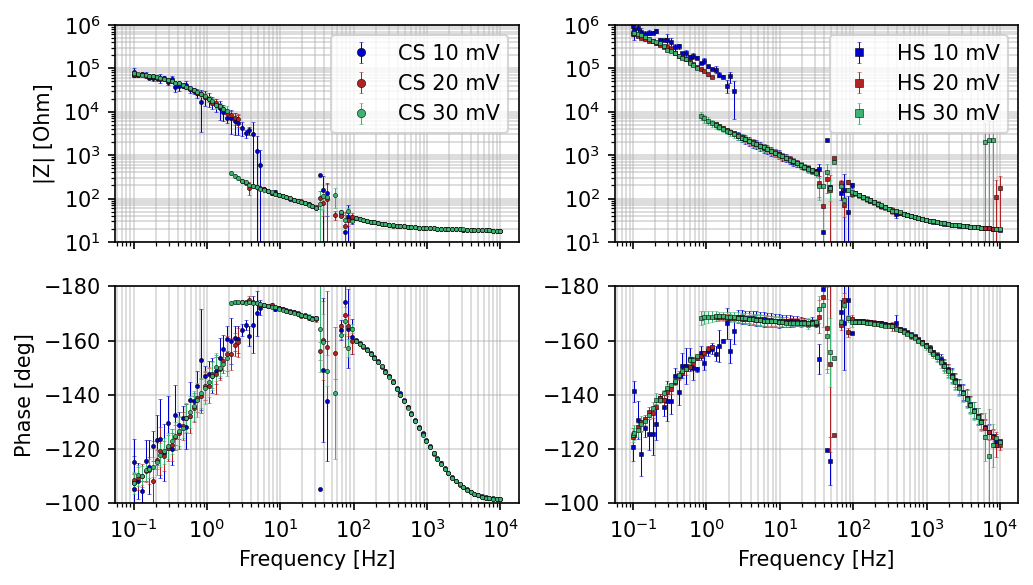

In [256]:
fig, axs = plt.subplots(2,2,figsize=(7,4), sharex=True, dpi=150)

ax1 = axs[0][0]
ax2 = axs[1][0]
bx1 = axs[0][1]
bx2 = axs[1][1]

common_args = {
    'fmt': 'o',
    'markersize': 2,    
    'markeredgecolor':'black',    # Color of the marker border
    'markeredgewidth':0.25,          # Width of the marker border    
    'elinewidth': 0.50, 
    'capsize': 1, 
    'capthick': 0.50,
}

ax1.errorbar(CS_10mV.index.to_numpy(), CS_10mV["Z"].to_numpy(), CS_10mV["Z STD"].to_numpy(),
             color='mediumblue', ecolor="mediumblue", label="CS 10 mV", **common_args)
ax1.errorbar(CS_20mV.index.to_numpy(), CS_20mV["Z"].to_numpy(), CS_20mV["Z STD"].to_numpy(),
             color='firebrick', ecolor="firebrick", label="CS 20 mV", **common_args)
ax1.errorbar(CS_30mV.index.to_numpy(), CS_30mV["Z"].to_numpy(), CS_30mV["Z STD"].to_numpy(),
             color='mediumseagreen', ecolor="mediumseagreen", label="CS 30 mV", **common_args)

ax2.errorbar(CS_10mV.index.to_numpy(), CS_10mV["theta"].to_numpy(), CS_10mV["theta STD"].to_numpy(),
             color='mediumblue', ecolor="mediumblue", label="CS 10 mV", **common_args)
ax2.errorbar(CS_20mV.index.to_numpy(), CS_20mV["theta"].to_numpy(), CS_20mV["theta STD"].to_numpy(),
             color='firebrick', ecolor="firebrick", label="CS 20 mV", **common_args)
ax2.errorbar(CS_30mV.index.to_numpy(), CS_30mV["theta"].to_numpy(), CS_30mV["theta STD"].to_numpy(),
             color='mediumseagreen', ecolor="mediumseagreen", label="CS 30 mV", **common_args)

common_args['fmt'] = 's'

bx1.errorbar(HS_10mV.index.to_numpy(), HS_10mV["Z"].to_numpy(), HS_10mV["Z STD"].to_numpy(),
             color='mediumblue', ecolor="mediumblue", label="HS 10 mV", **common_args)
bx1.errorbar(HS_20mV.index.to_numpy(), HS_20mV["Z"].to_numpy(), HS_20mV["Z STD"].to_numpy(),
             color='firebrick', ecolor="firebrick", label="HS 20 mV", **common_args)
bx1.errorbar(HS_30mV.index.to_numpy(), HS_30mV["Z"].to_numpy(), HS_30mV["Z STD"].to_numpy(),
             color='mediumseagreen', ecolor="mediumseagreen", label="HS 30 mV", **common_args)

bx2.errorbar(HS_10mV.index.to_numpy(), HS_10mV["theta"].to_numpy(), HS_10mV["theta STD"].to_numpy(),
             color='mediumblue', ecolor="mediumblue", label="HS 10 mV", **common_args)
bx2.errorbar(HS_20mV.index.to_numpy(), HS_20mV["theta"].to_numpy(), HS_20mV["theta STD"].to_numpy(),
             color='firebrick', ecolor="firebrick", label="HS 20 mV", **common_args)
bx2.errorbar(HS_30mV.index.to_numpy(), HS_30mV["theta"].to_numpy(), HS_30mV["theta STD"].to_numpy(),
             color='mediumseagreen', ecolor="mediumseagreen", label="HS 30 mV", **common_args)

ax1.grid(True, which="both", ls="-", alpha=0.5)
ax2.grid(True, which="both", ls="-", alpha=0.5)
bx1.grid(True, which="both", ls="-", alpha=0.5)
bx2.grid(True, which="both", ls="-", alpha=0.5)

ax1.legend(markerscale=2)
bx1.legend(markerscale=2)

ax1.set_ylabel('|Z| [Ohm]')
ax2.set_ylabel('Phase [deg]')
ax2.set_xlabel("Frequency [Hz]")
bx2.set_xlabel("Frequency [Hz]")

ax1.set_xscale("log")
ax1.set_yscale("log")
bx1.set_xscale("log")
bx1.set_yscale("log")

ax2.set_xscale("log")
ax2.set_yscale("linear")
bx2.set_xscale("log")
bx2.set_yscale("linear")

ax1.set_ylim(bottom=10, top=10**6)
bx1.set_ylim(bottom=10, top=10**6)
ax2.set_ylim(bottom=-100, top=-180)
bx2.set_ylim(bottom=-100, top=-180)

plt.tight_layout()
plt.plot()

plt.savefig('doublecolumn_bode_plot.png', dpi=600)

[]

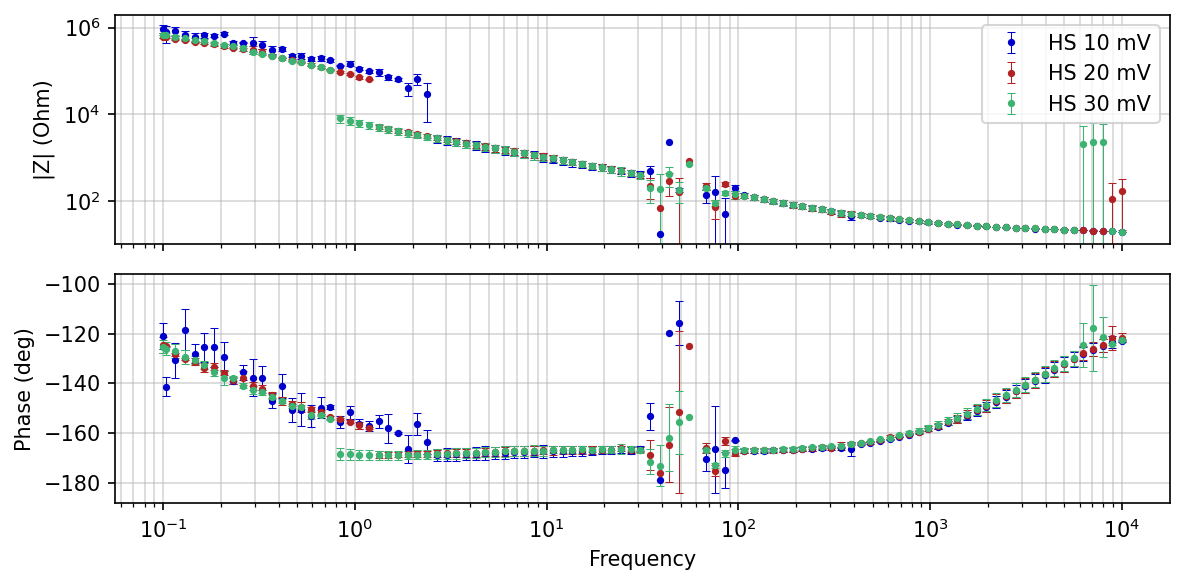

In [199]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,4), sharex=True, dpi=150)

ax1.errorbar(HS_df_10mV_means.index.to_numpy(), HS_df_10mV_means["Z"].to_numpy(), HS_df_10mV_err["Z"].to_numpy(),
             fmt = '.', color='mediumblue', markersize=5, 
             ecolor="mediumblue", elinewidth=0.50, capsize=2, capthick=0.50,
             label="HS 10 mV")
ax1.errorbar(HS_df_20mV_means.index.to_numpy(), HS_df_20mV_means["Z"].to_numpy(), HS_df_20mV_err["Z"].to_numpy(),
             fmt = '.', color='firebrick', markersize=5, 
             ecolor="firebrick", elinewidth=0.50, capsize=2, capthick=0.50,
             label="HS 20 mV")
ax1.errorbar(HS_df_30mV_means.index.to_numpy(), HS_df_30mV_means["Z"].to_numpy(), HS_df_30mV_err["Z"].to_numpy(),
             fmt = '.', color='mediumseagreen', markersize=5, 
             ecolor="mediumseagreen", elinewidth=0.50, capsize=2, capthick=0.50,
             label="HS 30 mV")

ax2.errorbar(HS_df_10mV_means.index.to_numpy(), HS_df_10mV_means["theta"].to_numpy(), HS_df_10mV_err["theta"].to_numpy(),
             fmt = '.', color='mediumblue', markersize=5, 
             ecolor="mediumblue", elinewidth=0.50, capsize=2, capthick=0.50,
             label="HS 10 mV")
ax2.errorbar(HS_df_20mV_means.index.to_numpy(), HS_df_20mV_means["theta"].to_numpy(), HS_df_20mV_err["theta"].to_numpy(),
             fmt = '.', color='firebrick', markersize=5, 
             ecolor="firebrick", elinewidth=0.50, capsize=2, capthick=0.50,
             label="HS 20 mV")
ax2.errorbar(HS_df_30mV_means.index.to_numpy(), HS_df_30mV_means["theta"].to_numpy(), HS_df_30mV_err["theta"].to_numpy(),
             fmt = '.', color='mediumseagreen', markersize=5, 
             ecolor="mediumseagreen", elinewidth=0.50, capsize=2, capthick=0.50,
             label="HS 30 mV")

ax1.grid(True, which="both", ls="-", alpha=0.5)
ax2.grid(True, which="both", ls="-", alpha=0.5)
ax1.legend()

#ax2.xaxis.set_major_locator(plt.MaxNLocator(11))
ax1.set_ylabel('|Z| [Ohm]')
ax2.set_ylabel('Phase [deg]')
ax2.set_xlabel("Frequency [Hz]")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax2.set_xscale("log")

plt.tight_layout()
plt.plot()

Okay, the errors with the impedence shift clearly show that:

    20mV is less reliable than 10mV at high frequencies, likely due to non-linearity,
    20mV is more reliable than 10 mV at low frequencies, or atleast, lower frequencies than 10mV

Makes me think that I need to use higher excitation voltages at low frequencies, although I've only seen 10mV and 20mV in research. this paper does 30mV! https://www.mdpi.com/2076-3417/14/13/5754

Then again, I've never seen errorbars on a Bode plot in a research paper

Source of discontinuities: https://www.gamry.com/Framework%20Help/HTML5%20-%20Tripane%20-%20Audience%20A/Content/UT/Discontinuities%20in%20EIS%20Spectra.htm


## Plotting average data on Nyquist plot

So let's have a look at how the Nyquist plot looks, with and without the sketchy data
So we'll remove everything below 10 Hz, plus remove the weird region at 50Hz

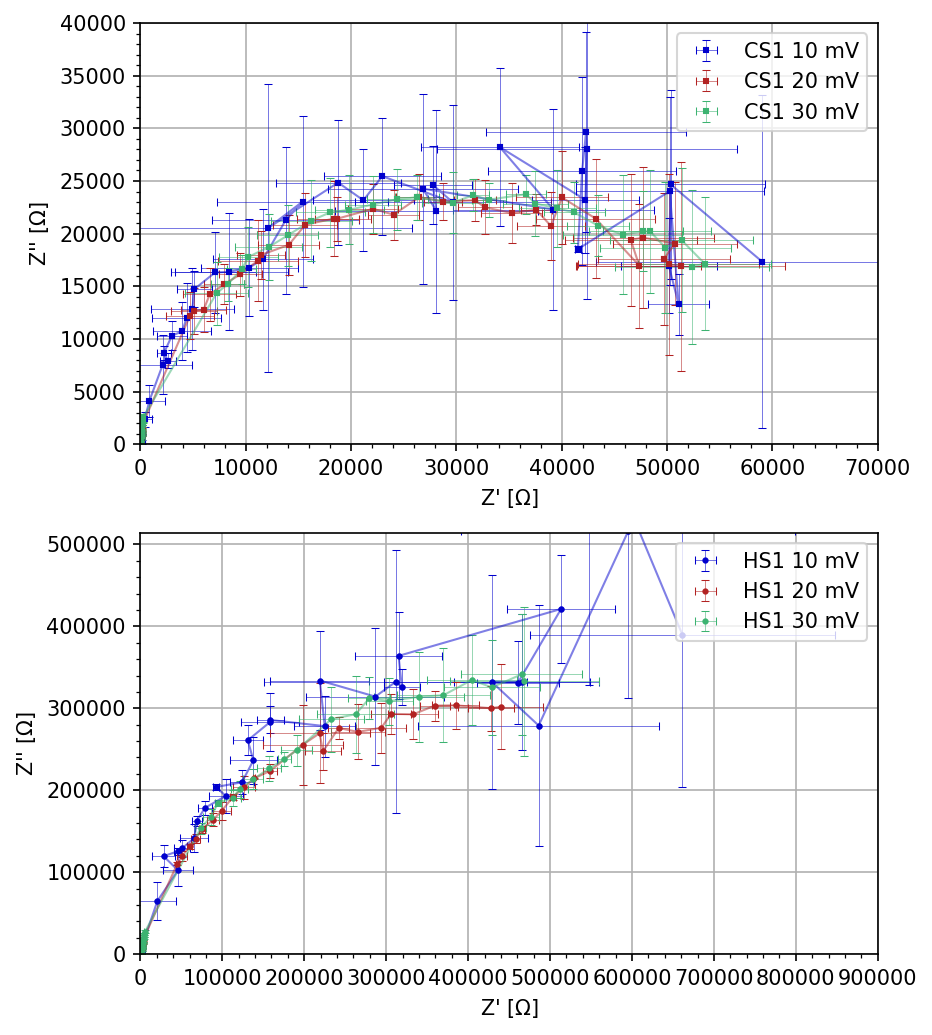

In [200]:
# Nyquist Plot

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    fig, (ax, bx) = plt.subplots(2, 1, figsize=(7, 7), dpi=150)

    # ######## #
    # CS stuff #
    # ######## #    
    ax.errorbar(x=(CS_df_10mV_means)["Z'"].to_numpy(), y=(-CS_df_10mV_means)["Z''"].to_numpy(), 
            xerr=(CS_df_10mV_err)["Z"].to_numpy(), yerr=(CS_df_10mV_err)["Z"].to_numpy(),             
            color='mediumblue', markersize=2, fmt = 's',  
            ecolor="mediumblue", elinewidth=0.250, capsize=2, capthick=0.50,
            label="CS1 10 mV")
    ax.errorbar(x=(CS_df_20mV_means)["Z'"].to_numpy(), y=(-CS_df_20mV_means)["Z''"].to_numpy(), 
            xerr=(CS_df_20mV_err)["Z"].to_numpy(), yerr=(CS_df_20mV_err)["Z"].to_numpy(),             
            color='firebrick', markersize=2, fmt = 's', 
            ecolor="firebrick", elinewidth=0.250, capsize=2, capthick=0.50,
            label="CS1 20 mV")
    ax.errorbar(x=(CS_df_30mV_means)["Z'"].to_numpy(), y=(-CS_df_30mV_means)["Z''"].to_numpy(), 
            xerr=(CS_df_30mV_err)["Z"].to_numpy(), yerr=(CS_df_30mV_err)["Z"].to_numpy(),             
            color='mediumseagreen', markersize=2, fmt = 's',  
            ecolor="mediumseagreen", elinewidth=0.250, capsize=2, capthick=0.50,
            label="CS1 30 mV")    

    ax.plot((CS_df_10mV_means)["Z'"].to_numpy(), (-CS_df_10mV_means)["Z''"].to_numpy(), 's-',
            linewidth=1, alpha=0.5, color='mediumblue', markersize=2)
    ax.plot((CS_df_20mV_means)["Z'"].to_numpy(), (-CS_df_20mV_means)["Z''"].to_numpy(), 's-', 
            linewidth=1, alpha=0.5, color='firebrick', markersize=2)
    ax.plot((CS_df_30mV_means)["Z'"].to_numpy(), (-CS_df_30mV_means)["Z''"].to_numpy(), 's-', 
            linewidth=1, alpha=0.5, color='mediumseagreen', markersize=2)

    # ######## #
    # HS stuff #
    # ######## #

    bx.errorbar(x=(HS_df_10mV_means)["Z'"].to_numpy(), y=(-HS_df_10mV_means)["Z''"].to_numpy(), 
            xerr=(HS_df_10mV_err)["Z"].to_numpy(), yerr=(HS_df_10mV_err)["Z"].to_numpy(),             
            color='mediumblue', markersize=2, fmt = 'o',  
            ecolor="mediumblue", elinewidth=0.250, capsize=2, capthick=0.50,
            label="HS1 10 mV")
    bx.errorbar(x=(HS_df_20mV_means)["Z'"].to_numpy(), y=(-HS_df_20mV_means)["Z''"].to_numpy(), 
            xerr=(HS_df_20mV_err)["Z"].to_numpy(), yerr=(HS_df_20mV_err)["Z"].to_numpy(),             
            color='firebrick', markersize=2, fmt = 'o', 
            ecolor="firebrick", elinewidth=0.250, capsize=2, capthick=0.50,
            label="HS1 20 mV")
    bx.errorbar(x=(HS_df_30mV_means)["Z'"].to_numpy(), y=(-HS_df_30mV_means)["Z''"].to_numpy(), 
            xerr=(HS_df_30mV_err)["Z"].to_numpy(), yerr=(HS_df_30mV_err)["Z"].to_numpy(),             
            color='mediumseagreen', markersize=2, fmt = 'o',  
            ecolor="mediumseagreen", elinewidth=0.250, capsize=2, capthick=0.50,
            label="HS1 30 mV")    
    
    bx.plot((HS_df_10mV_means)["Z'"].to_numpy(), (-HS_df_10mV_means)["Z''"].to_numpy(), 'o-',
            linewidth=1, alpha=0.5, color='mediumblue', markersize=2)
    bx.plot((HS_df_20mV_means)["Z'"].to_numpy(), (-HS_df_20mV_means)["Z''"].to_numpy(), 'o-', 
            linewidth=1, alpha=0.5, color='firebrick', markersize=2)
    bx.plot((HS_df_30mV_means)["Z'"].to_numpy(), (-HS_df_30mV_means)["Z''"].to_numpy(), 'o-', 
            linewidth=1, alpha=0.5, color='mediumseagreen', markersize=2)

    # ############## #
    # Graphics stuff #
    # ############## #    
    
    ax.set_xlabel(r"Z' $[\Omega]$")
    ax.set_ylabel(r"Z'' $[\Omega]$")
    ax.legend(loc='upper right')
    bx.set_xlabel(r"Z' $[\Omega]$")
    bx.set_ylabel(r"Z'' $[\Omega]$")
    bx.legend(loc='upper right')

    # Set minor locator for the x-axis with an interval of 0.5
    ax.grid(True)
    #ax.xaxis.set_major_locator(tck.MultipleLocator(10000))
    #ax.yaxis.set_major_locator(tck.MultipleLocator(10000))
    bx.grid(True)
    #bx.xaxis.set_major_locator(tck.MultipleLocator(10000))
    #bx.yaxis.set_major_locator(tck.MultipleLocator(10000))
    
    ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
    ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax.axes.set_aspect('equal')
    bx.xaxis.set_minor_locator(tck.AutoMinorLocator())
    bx.yaxis.set_minor_locator(tck.AutoMinorLocator())
    bx.axes.set_aspect('equal')
   
    ax.set_xlim(left=0, right=70000)
    ax.set_ylim(bottom=0, top=(4/7)*70000)
    bx.set_xlim(left=0, right=900000)
    bx.set_ylim(bottom=0, top=(4/7)*900000)


plt.tight_layout()
plt.show()

# Curve fitting


Fitting is performed by non-linear least squares regression of circuit model to impedence data via the scipy.optimize.curve_fit function.

The objective function is:
$$ \chi^2 = \sum_{n=0}^{N} [Z^\prime_{exp}(\omega_n) - Z^\prime_{fit}(\omega_n)]^2 +
               [Z^{\prime\prime}_{exp}(\omega_n) - Z^{\prime\prime}_{fit}(\omega_n)]^2 $$


               


| Circuit Element | Impedence                                    |
| --------------- | -------------------------------------------- | 
| Resistor        | $$ Z = R $$                                  |
| Capacitor       | $$ Z = \frac{1}{C \cdot j 2 \pi f} $$        |
| Inductor        | $$Z = L \cdot j 2 \pi f $$                   |
| CPE             | $$Z = \frac{1}{Q \cdot (j 2 \pi f)^\alpha}$$ |

| Impedences in parallel | Impedences in series |
| --------------- | -------------------------------------------- | 
| $$ Z_{parallel} = \frac{1}{\frac{1}{Z_1} + \frac{1}{Z_2} + ... + \frac{1}{Z_n}}$$ | $$ Z_{series} = Z_1 + Z_2 + ... + Z_n $$

In [146]:
import functools
import numpy as np

def R(f, R): return np.zeros(len(f)) + (R + 0 * 1j)
def C(f, C): return 1.0 / (C * 1j * (2 * np.pi * np.array(f)) )
def L(f, L): return L * 1j * (2 * np.pi * np.array(f))
def CPE(f, Q, alpha): return 1.0 / (Q * (1j * (2 * np.pi * np.array(f))) ** alpha)

def s(*args): return functools.reduce(np.add, [*args])
def p(*args): return np.reciprocal(functools.reduce(np.add, np.reciprocal([*args])))

f = np.linspace(1e5,1e-2,70)

# Some common-sense tests to make sure the code is correct
assert (s(R(f, 10),R(f, 10)) == R(f, 20)).all()
assert (p(R(f, 10),R(f, 10)) == R(f, 5)).all()
assert (s(C(f, 10),C(f, 10)) == C(f, 5)).all()
assert (p(C(f, 10),C(f, 10)) == C(f, 20)).all()


In [147]:
def randles_circuit(f, Rs, Rp, Q, alpha): 
    return s(R(f, Rs), p(R(f, Rp), CPE(f, Q, alpha)))

def model_func(f, Rs, Rp, Q, alpha):
    Z_fit = randles_circuit(f, Rs, Rp, Q, alpha)
    return np.concatenate([Z_fit.real,Z_fit.imag])    


In [187]:
print("Starting curve_fit for real data...")
try:
    CS_popt, CS_pcov = scipy.optimize.curve_fit( 
        f = model_func,     
        xdata = CS_df_20mV_means["Z'"].dropna().index,
        ydata = np.concatenate([CS_df_20mV_means["Z'"].dropna().to_numpy(),
                                CS_df_20mV_means["Z''"].dropna().to_numpy()]),
        sigma = np.concatenate([CS_df_20mV_err["Z'"].dropna().to_numpy(),
                                CS_df_20mV_err["Z''"].dropna().to_numpy()]),       
        p0=     [10.0, 7e5,  1e-6, 0.87],  # Initial guesses for the parameters (R_s, R_ct, Q, alpha)
        bounds=([0,    0,    1e-9, 0], 
                [1000, 1e15, 1e-2, 1]), # Helps to keep parameters within physically realistic ranges. 
        maxfev=5000000) # Max number of function evaluations
    
    HS_popt, HS_pcov = scipy.optimize.curve_fit( 
        f = model_func,     
        xdata = HS_df_20mV_means["Z'"].dropna().index,
        ydata = np.concatenate([HS_df_20mV_means["Z'"].dropna().to_numpy(),
                                HS_df_20mV_means["Z''"].dropna().to_numpy()]),
        sigma = np.concatenate([HS_df_20mV_err["Z'"].dropna().to_numpy(),
                                HS_df_20mV_err["Z''"].dropna().to_numpy()]),     
        p0=     [10.0, 7e6,  1e-6, 0.87],  # Initial guesses for the parameters (R_s, R_ct, Q, alpha)
        bounds=([0,    0,    1e-9, 0], 
                [1000, 1e15, 1e-2, 1]), # Helps to keep parameters within physically realistic ranges. 
        maxfev=5000000) # Max number of function evaluations

except RuntimeError:
    print("Curve fitting failed. Could not find optimal parameters.")
    print("Try adjusting initial guesses, bounds, or the model itself.")
except ValueError as e:
    print(f"An error occurred: {e}") 
else:
    print("curve_fit finished successfully!")

    # Cast Stellite 1 Results
    print("\nOptimized Parameters for Cast Stellite 1:")    
    CS_perr = np.sqrt(np.diag(CS_pcov))
    for name, val, err in zip(["Rs", "Rp", "Q", "alpha"], CS_popt, CS_perr):
        print(f"{name:<8}: {val:.2e} ± {err:.2e} ( ± {100*(err/val):.2e} % )")

    # HIPed Stellite 1 Results
    print("\nOptimized Parameters for HIPed Stellite 1:")    
    HS_perr = np.sqrt(np.diag(HS_pcov))
    for name, val, err in zip(["Rs", "Rp", "Q", "alpha"], HS_popt, HS_perr):
        print(f"{name:<8}: {val:.2e} ± {err:.2e} ( ± {100*(err/val):.2e} % )")

#freq_data = CS_df_20mV_means["Z'"].dropna().index    
#Z_fit = randles_circuit(CS_df_20mV_means["Z'"].dropna().index, *CS_popt)

Starting curve_fit for real data...
An error occurred: `sigma` has incorrect shape.


In [189]:
#np.concatenate([HS_df_20mV_means["Z'"].to_numpy(),
#                HS_df_20mV_means["Z''"].to_numpy()])
np.concatenate([HS_df_20mV_err["Z'"].to_numpy(),
                HS_df_20mV_err["Z''"].to_numpy()])

array([3.67834633e+04, 1.95687710e+04, 2.02220682e+04, 1.29496379e+04,
       2.15795089e+04, 1.74141769e+04, 2.15404497e+04, 2.36723049e+04,
       9.31676784e+03, 1.56341477e+04, 4.32178014e+04, 3.43015200e+04,
       6.00647453e+03, 7.35329405e+02, 9.74733600e+03, 2.54967161e+03,
       7.64150168e+03, 5.59012913e+03, 2.85256342e+03, 4.07609320e+03,
       2.11745315e+03, 4.25148623e+03, 1.53912003e+03, 4.38806256e+02,
       3.76325966e+02, 3.29692706e+02, 3.15896217e+02, 2.88992776e+02,
       2.61128910e+02, 2.40498360e+02, 2.58823287e+02, 2.42415320e+02,
       2.32264385e+02, 2.21366227e+02, 2.08315562e+02, 2.00352184e+02,
       1.89725395e+02, 1.69886736e+02, 1.54726647e+02, 1.40065818e+02,
       1.28174126e+02, 1.23348525e+02, 1.09293934e+02, 9.63371446e+01,
       9.04585143e+01, 7.50763344e+01, 7.10522272e+01, 6.33900376e+01,
       5.10078081e+01, 4.98053918e+01, 3.95831124e+01, 8.04100755e+01,
                  nan, 1.09511041e+02, 1.28018218e+02,            nan,
      

I did the above analysis with 20mV, but I tried it out with 10mV and 30 mV

|        | 10 mV                                | 20mV                                  | 30mV                                 |
|--------|--------------------------------------|---------------------------------------|--------------------------------------|
|Rs      | 7.22e-16 ± 2.31e+02 ( ± 3.21e+19 % ) | 2.93e+01 ± 2.02e+02 ( ± 690  % )      | 1.65e+02 ± 2.44e+02 ( ± 147  % )     |
|Rp      | 6.42e+04 ± 1.29e+03 ( ± 2.01 % )     | 5.82e+04 ± 9.77e+02 ( ± 1.68 % )      | 5.83e+04 ± 1.15e+03 ( ± 1.97 % )     |
|Q       | 7.79e-06 ± 1.82e-07 ( ± 2.34 % )     | 7.20e-06 ± 1.60e-07 ( ± 2.22 % )      | 7.16e-06 ± 1.85e-07 ( ± 2.58 % )     |
|alpha   | 8.58e-01 ± 1.44e-02 ( ± 1.68 % )     | 8.86e-01 ± 1.31e-02 ( ± 1.47 % )      | 9.11e-01 ± 1.56e-02 ( ± 1.72 % )     |


Oddly enough, the 20mV is the one that shows the least standard deviation error! 
I would have sworn that it was the 30mV from a visual analysis, although not by much.
The 20mV is only slightly better, but still. I am indeed ignoring Rs as important. Cool!

# Showing Nyquist plot with experimental data and fitted curve

## Single column format

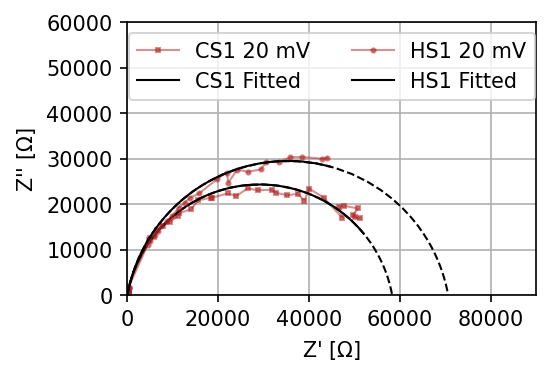

In [176]:
# Nyquist Plot
import matplot2tikz
from matplotlib.figure import Figure
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from cairosvg import svg2png


fig, ax = plt.subplots(figsize=(3.52, 3.52), dpi=150)

# ############### #
# Cast Stellite 1 #
# ############### #

#ax.plot((CS_df_10mV_means)["Z'"].to_numpy(), (-CS_df_10mV_means)["Z''"].to_numpy(), 's-',
#        linewidth=1, alpha=0.5, color='mediumblue', markersize=2,
#        label="CS1 10 mV")
ax.plot((CS_df_20mV_means)["Z'"].to_numpy(), (-CS_df_20mV_means)["Z''"].to_numpy(), 's-', 
        linewidth=1, alpha=0.5, color='firebrick', markersize=2,
        label="CS1 20 mV")
#ax.plot((CS_df_30mV_means)["Z'"].to_numpy(), (-CS_df_30mV_means)["Z''"].to_numpy(), 's-', 
#        linewidth=1, alpha=0.5, color='mediumseagreen', markersize=2,
#        label="CS1 30 mV")

Z_fit = randles_circuit(np.logspace(-1,4,num=100,endpoint=True), *CS_popt)
ax.plot(Z_fit.real, -Z_fit.imag, 'k-', linewidth=1, label='CS1 Fitted')

Z_fit = randles_circuit(np.logspace(-3,4,num=100,endpoint=True), *CS_popt)
ax.plot(Z_fit.real, -Z_fit.imag, 'k--', linewidth=1) #, label='Fitted Model extrapolated to lower frequencies')



# #################### #
# As-hipped Stellite 1 #
# #################### #

#ax.plot((HS_df_10mV_means)["Z'"].to_numpy()/10, (-HS_df_10mV_means)["Z''"].to_numpy()/10, 'o-',
#        linewidth=1, alpha=0.5, color='mediumblue', markersize=2,
#        label="HS1 10 mV")
ax.plot((HS_df_20mV_means)["Z'"].to_numpy()/10, (-HS_df_20mV_means)["Z''"].to_numpy()/10, 'o-', 
        linewidth=1, alpha=0.5, color='firebrick', markersize=2,
        label="HS1 20 mV")
#ax.plot((HS_df_30mV_means)["Z'"].to_numpy()/10, (-HS_df_30mV_means)["Z''"].to_numpy()/10, 'o-', 
#        linewidth=1, alpha=0.5, color='mediumseagreen', markersize=2,
#        label="HS1 30 mV")

Z_fit = randles_circuit(np.logspace(-1,4,num=100,endpoint=True), *HS_popt)
ax.plot(Z_fit.real/10, -Z_fit.imag/10, 'k-', linewidth=1, label='HS1 Fitted')

Z_fit = randles_circuit(np.logspace(-3,4,num=100,endpoint=True), *HS_popt)
ax.plot(Z_fit.real/10, -Z_fit.imag/10, 'k--', linewidth=1) #, label='Fitted Model extrapolated to lower frequencies')



# ######################### #
# Annotation and decoration #
# ######################### #

ax.set_xlabel(r"Z' $[\Omega]$")
ax.set_ylabel(r"Z'' $[\Omega]$")
#ax.set_title('Nyquist Plot')
ax.legend(loc='upper center', ncol=2)

ax.grid(True)
ax.set_xlim(left=0, right=90000)
ax.set_ylim(bottom=0, top=60000)
ax.axes.set_aspect('equal')

#svg2png(url="tikz_playground.svg",  write_to="tikz_playground.png", dpi=6000, scale=5)
#arr_img = plt.imread("tikz_playground.png")
#im = OffsetImage(arr_img, zoom=0.2)
#ab = AnnotationBbox(im, (0.325, 0.82), xycoords='axes fraction', frameon=True)
#ax.add_artist(ab)
plt.show()

#plt.show()
#matplot2tikz.clean_figure()
#matplot2tikz.save("mytikz.tex")

## Double column format

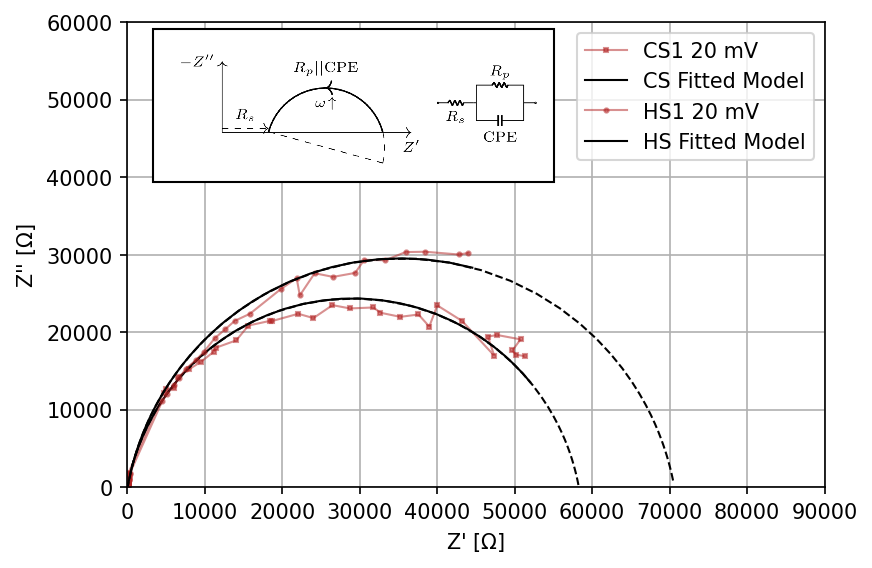

In [177]:
# Nyquist Plot
import matplot2tikz
from matplotlib.figure import Figure
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from cairosvg import svg2png


fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

# ############### #
# Cast Stellite 1 #
# ############### #

#ax.plot((CS_df_10mV_means)["Z'"].to_numpy(), (-CS_df_10mV_means)["Z''"].to_numpy(), 's-',
#        linewidth=1, alpha=0.5, color='mediumblue', markersize=2,
#        label="CS1 10 mV")
ax.plot((CS_df_20mV_means)["Z'"].to_numpy(), (-CS_df_20mV_means)["Z''"].to_numpy(), 's-', 
        linewidth=1, alpha=0.5, color='firebrick', markersize=2,
        label="CS1 20 mV")
#ax.plot((CS_df_30mV_means)["Z'"].to_numpy(), (-CS_df_30mV_means)["Z''"].to_numpy(), 's-', 
#        linewidth=1, alpha=0.5, color='mediumseagreen', markersize=2,
#        label="CS1 30 mV")

Z_fit = randles_circuit(np.logspace(-1,4,num=100,endpoint=True), *CS_popt)
ax.plot(Z_fit.real, -Z_fit.imag, 'k-', linewidth=1, label='CS Fitted Model')

Z_fit = randles_circuit(np.logspace(-3,4,num=100,endpoint=True), *CS_popt)
ax.plot(Z_fit.real, -Z_fit.imag, 'k--', linewidth=1) #, label='Fitted Model extrapolated to lower frequencies')



# #################### #
# As-hipped Stellite 1 #
# #################### #

#ax.plot((HS_df_10mV_means)["Z'"].to_numpy()/10, (-HS_df_10mV_means)["Z''"].to_numpy()/10, 'o-',
#        linewidth=1, alpha=0.5, color='mediumblue', markersize=2,
#        label="HS1 10 mV")
ax.plot((HS_df_20mV_means)["Z'"].to_numpy()/10, (-HS_df_20mV_means)["Z''"].to_numpy()/10, 'o-', 
        linewidth=1, alpha=0.5, color='firebrick', markersize=2,
        label="HS1 20 mV")
#ax.plot((HS_df_30mV_means)["Z'"].to_numpy()/10, (-HS_df_30mV_means)["Z''"].to_numpy()/10, 'o-', 
#        linewidth=1, alpha=0.5, color='mediumseagreen', markersize=2,
#        label="HS1 30 mV")

Z_fit = randles_circuit(np.logspace(-1,4,num=100,endpoint=True), *HS_popt)
ax.plot(Z_fit.real/10, -Z_fit.imag/10, 'k-', linewidth=1, label='HS Fitted Model')

Z_fit = randles_circuit(np.logspace(-3,4,num=100,endpoint=True), *HS_popt)
ax.plot(Z_fit.real/10, -Z_fit.imag/10, 'k--', linewidth=1) #, label='Fitted Model extrapolated to lower frequencies')



# ######################### #
# Annotation and decoration #
# ######################### #

ax.set_xlabel(r"Z' $[\Omega]$")
ax.set_ylabel(r"Z'' $[\Omega]$")
#ax.set_title('Nyquist Plot')
ax.legend(loc='upper right')

ax.grid(True)
ax.set_xlim(left=0, right=90000)
ax.set_ylim(bottom=0, top=60000)
ax.axes.set_aspect('equal')

svg2png(url="tikz_playground.svg",  write_to="tikz_playground.png", dpi=6000, scale=5)
arr_img = plt.imread("tikz_playground.png")
im = OffsetImage(arr_img, zoom=0.2)
ab = AnnotationBbox(im, (0.325, 0.82), xycoords='axes fraction', frameon=True)
ax.add_artist(ab)
plt.show()

#plt.show()
#matplot2tikz.clean_figure()
#matplot2tikz.save("mytikz.tex")

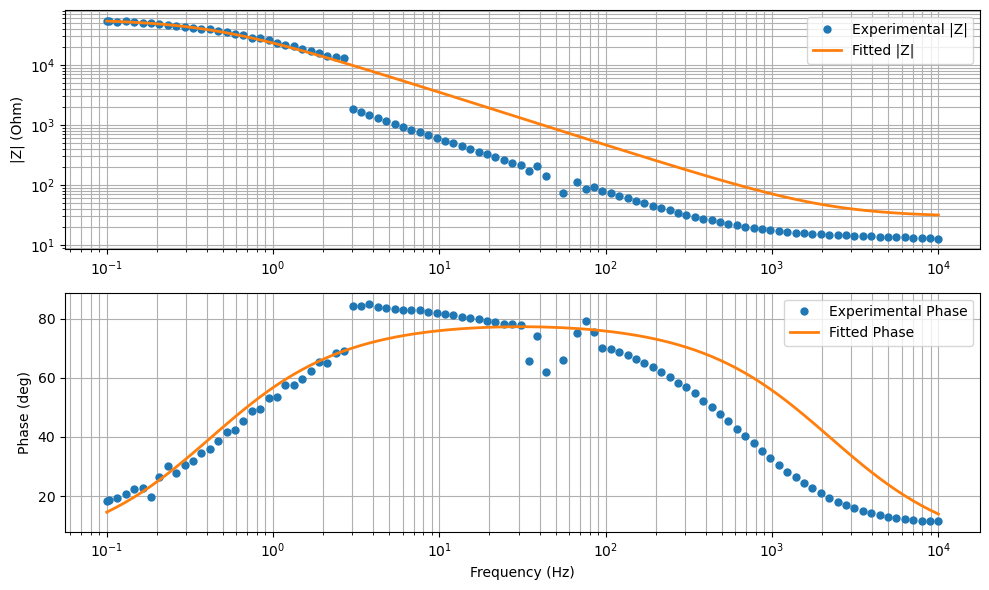

In [178]:
# Bode Plots
fig, (ax, bx) = plt.subplots(2,1,figsize=(10, 6))


Z_fit = randles_circuit(CS_df_20mV_means["Z'"].index, *CS_popt)

freq_exp = CS_df_20mV_means["Z'"].index
imp_exp = np.sqrt((CS_df_20mV_means["Z'"].to_numpy())**2 + (CS_df_20mV_means["Z''"].to_numpy())**2) 
phase_exp = np.arctan2(-((CS_df_20mV_means)["Z''"].to_numpy()), ((CS_df_20mV_means)["Z'"].to_numpy())) * 180 / np.pi

freq_fit = CS_df_20mV_means["Z'"].index
imp_fit = np.sqrt(Z_fit.real**2 + Z_fit.imag**2)
phase_fit = np.arctan2(-Z_fit.imag, Z_fit.real) * 180 / np.pi

# Magnitude
ax.loglog(freq_exp, imp_exp, 'o', markersize=5, label='Experimental |Z|')
ax.loglog(freq_fit, imp_fit, '-', linewidth=2, label='Fitted |Z|')
ax.set_ylabel('|Z| (Ohm)')
ax.legend()
ax.grid(True, which="both", ls="-")

# Phase
bx.semilogx(freq_exp, phase_exp, 'o', markersize=5, label='Experimental Phase')
bx.semilogx(freq_fit, phase_fit, '-', linewidth=2, label='Fitted Phase')
bx.set_xlabel('Frequency (Hz)')
bx.set_ylabel('Phase (deg)')
bx.legend()
bx.grid(True, which="both", ls="-")
    
plt.tight_layout()
plt.show()


Oh gods, this is terrible.
The Nyquist plot is HIDING just how bad it is, oh my god
The Bode plot makes me want to cry.

Adding *sigma* to the *scipy.optimize.curve_fit* does make the fit better with the Bode plot ONLY WITH THE STARTING DATA, 
but it makes the Nyquist plot look absolutely insane.
This is maybe because of the lack of Rs? Because the Rp goes insaaaane.

This is definitely because of the objective function I'm using, but I don't know which other function to use.